In [ ]:
# Importamos librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Cargamos los datos mnist
mnist = fetch_openml("mnist_784")
X, y = mnist.data, mnist.target.astype(int)

# Seleccion de solo imagenes de dígitos 0 y 1
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

# Normalizar datos
X_train = X_train / 255.0
X_test  = X_test  / 255.0

# dimensiones de los conjuntos
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

def phi(x):
    return 1 / (1 + np.exp(-x))

def grad_phi(x):
    return (np.exp(-x))/((np.exp(-x) + 1)**2)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(11824, 784) (11824,)
(2956, 784) (2956,)


In [ ]:
input_size = X_train.shape[1]
hidden_size_1 = 128
hidden_size_2 = 16
output_size = input_size

np.random.seed(0)
W_1 = np.random.randn(input_size, hidden_size_1)*np.sqrt(2./(input_size+hidden_size_1))
b_1 = np.zeros((1,hidden_size_1))
W_2 = np.random.randn(hidden_size_1, hidden_size_2)*np.sqrt(2./(input_size+hidden_size_1))
b_2 = np.zeros((1,hidden_size_2))
W_3 = np.random.randn(hidden_size_2, output_size)*np.sqrt(2./(input_size+hidden_size_1))
b_3 = np.zeros((1, output_size))

learning_rate = 1e-4
epochs = 150
batch_size = 128
Losses = []

Epoch 0, Loss: 2.535864861387554
Epoch 1, Loss: 2.0177553076941512
Epoch 2, Loss: 1.76687380922722
Epoch 3, Loss: 1.643014914888364
Epoch 4, Loss: 1.570635190117402
Epoch 5, Loss: 1.5557130465796123
Epoch 6, Loss: 1.6112697774555194
Epoch 7, Loss: 1.5999807536851411
Epoch 8, Loss: 1.5603110271532954
Epoch 9, Loss: 1.5996082223293264
Epoch 10, Loss: 1.5802869238285628
Epoch 11, Loss: 1.5644300741756894
Epoch 12, Loss: 1.5874751592880258
Epoch 13, Loss: 1.5246192986675988
Epoch 14, Loss: 1.5678521875444282
Epoch 15, Loss: 1.5872138580308268
Epoch 16, Loss: 1.5946329728855986
Epoch 17, Loss: 1.5499321598439735
Epoch 18, Loss: 1.6039620524420402
Epoch 19, Loss: 1.57759172071437
Epoch 20, Loss: 1.517895410267502
Epoch 21, Loss: 1.561324518611645
Epoch 22, Loss: 1.525466884811117
Epoch 23, Loss: 1.5558659842888773
Epoch 24, Loss: 1.534396328691932
Epoch 25, Loss: 1.5143406292488253
Epoch 26, Loss: 1.4887343445007069
Epoch 27, Loss: 1.5448036452840412
Epoch 28, Loss: 1.483549852624408
Epoch 2

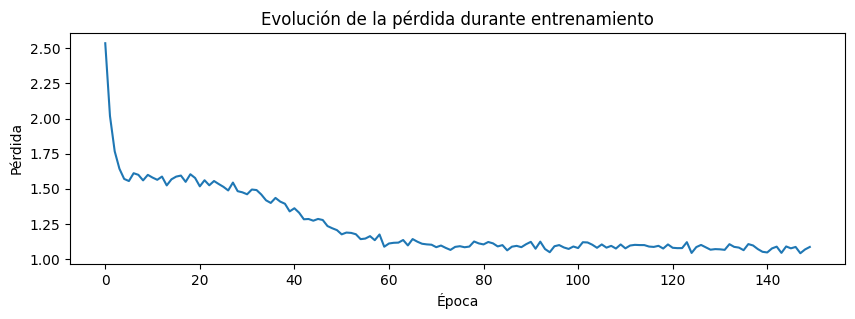

Dimension imagen original:  784
Dimension imagen predicha:  784


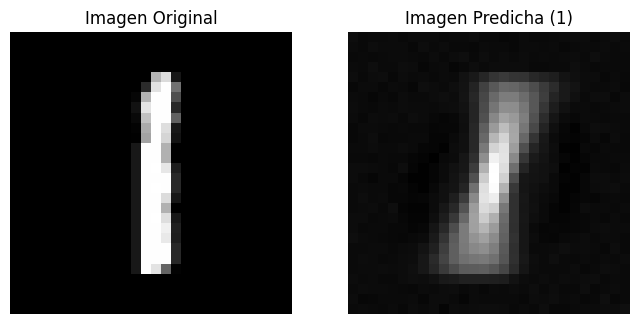

In [ ]:
for epoch in range(epochs):
  loss_epoch = 0
  np.random.shuffle(X_train)
  for i in range(batch_size, X.shape[1]+1, batch_size):
    y_0 = X_train[i - batch_size: i]
     # Forward propagation
    z_1 = y_0 @ W_1 + b_1
    y_1 = phi(z_1)
    z_2 = y_1 @ W_2 + b_2
    y_2 = phi(z_2)
    y_pred = y_2 @ W_3 + b_3

    # Evaluamos la pérdida
    loss = 0.5*np.linalg.norm(y_0 - y_pred)**2
    loss_epoch += loss

        # Backpropagation
    dl_dy = y_pred - y_0
    grad_W3 = y_2.T @ dl_dy
    grad_b3 = np.sum(dl_dy, axis = 0, keepdims = True)
    dy2 = dl_dy @ W_3.T
    dz2 = dy2 * grad_phi(z_2)
    grad_W2 = y_1.T @ dz2
    grad_b2 = np.sum(dz2, axis = 0, keepdims = True)
    dy1 = dz2 @ W_2.T
    dz1 = dy1 * grad_phi(z_1)
    grad_W1 = y_0.T @ dz1
    grad_b1 = np.sum(dz1, axis = 0, keepdims = True)

        # Paso de descenso de gradiente
    W_3 -= learning_rate * grad_W3
    b_3 -= learning_rate * grad_b3
    W_2 -= learning_rate * grad_W2
    b_2 -= learning_rate * grad_b2
    W_1 -= learning_rate * grad_W1
    b_1 -= learning_rate * grad_b1

  loss_epoch /= X_train.shape[0]
  Losses.append(loss_epoch)

  if epoch % 1 == 0:
    print(f"Epoch {epoch}, Loss: {loss_epoch}")

# Visualización de la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 3))
plt.plot(range(epochs), Losses)
plt.title('Evolución de la pérdida durante entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

# Seleccionar una imagen de prueba aleatoria
idx = np.random.randint(len(X_test))
img = X_test[idx]
true_label = y_test[idx]
print("Dimension imagen original: ", img.size)

# Rehacer la predicción solo para esta imagen
z_1 = img @ W_1 + b_1
y_1 = phi(z_1)
z_2 = y_1 @ W_2 + b_2
y_2 = phi(z_2)
y_pred = y_2 @ W_3 + b_3
print("Dimension imagen predicha: ", y_pred.size)

# Redimensionar la imagen predicha y mostrarla junto con la imagen original
img_pred = y_pred.reshape(28, 28)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_pred, cmap='gray')
plt.title(f'Imagen Predicha ({true_label})')
plt.axis('off')

plt.show()